In [5]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr   
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.base import TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost.sklearn import XGBRegressor
from sklearn import tree
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()

In [6]:
df = pd.read_csv('churn_imbalanced.csv')

In [7]:
# df.drop(['customer_id'],axis=1).head()

# Data overview

## Data size

In [9]:
df.feedback.value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   customer_id                   36992 non-null  object 
 2   Name                          36992 non-null  object 
 3   age                           36992 non-null  int64  
 4   gender                        36992 non-null  object 
 5   security_no                   36992 non-null  object 
 6   region_category               31564 non-null  object 
 7   membership_category           36992 non-null  object 
 8   joining_date                  36992 non-null  object 
 9   joined_through_referral       36992 non-null  object 
 10  referral_id                   36992 non-null  object 
 11  preferred_offer_types         36704 non-null  object 
 12  medium_of_operation           36992 non-null  object 
 13  i

In [152]:
print(f'There are {df.shape[0]} data points ,  {df.shape[1]} features in the dataset')

There are 36992 data points ,  26 features in the dataset


## variable types

In [153]:
df.dtypes

Unnamed: 0                        int64
customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object


## Numeric variables

In [154]:
df.select_dtypes(include=[np.number]).head(3)

,Unnamed: 0,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,0,18,17,300.63,53005.25,781.75,0
1,1,32,16,306.34,12838.38,NaN,0
2,2,44,14,516.16,21027.00,500.69,1


## Categorical variables

In [155]:
df.select_dtypes(include = ['object']).head(3)
# df.select_dtypes(include = [np.object]) 无引号也OK

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,fffe43004900440032003100300035003700,Traci Peery,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,fffe4300490044003100390032003600,Merideth Mcmeen,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website


###  There are 17 categorical variables and 6 numerical variables

## Statistic description on numeric variables

In [156]:
df.describe()# only returns numeric analysis

,Unnamed: 0,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,18495.500000,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.265652
std,10678.814916,15.867412,228.819900,398.289149,19444.806226,194.063624,0.441686
min,0.000000,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,9247.750000,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,18495.500000,37.000000,12.000000,161.765000,27554.485000,697.620000,0.000000
75%,27743.250000,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,36991.000000,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


## Imbalanced dataset based on Churn status

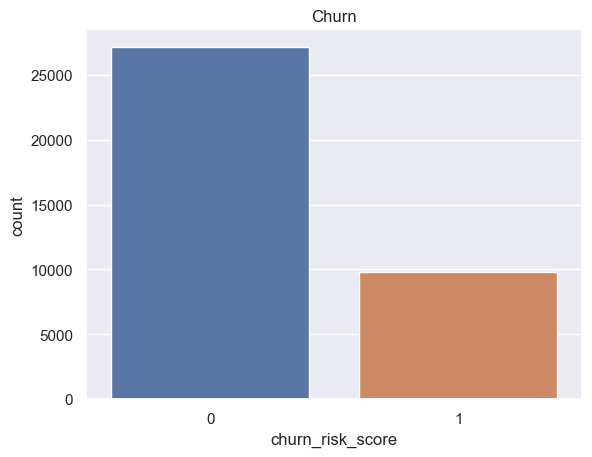

Percentage of positive churn outcome: 0.2656520328719723*


In [157]:
sns.countplot(x=df['churn_risk_score'])
plt.title('Churn')
plt.show()

print(f"Percentage of positive churn outcome: {df['churn_risk_score'].sum()/len(df)}*")


## Plot Categorical  variables by churn status

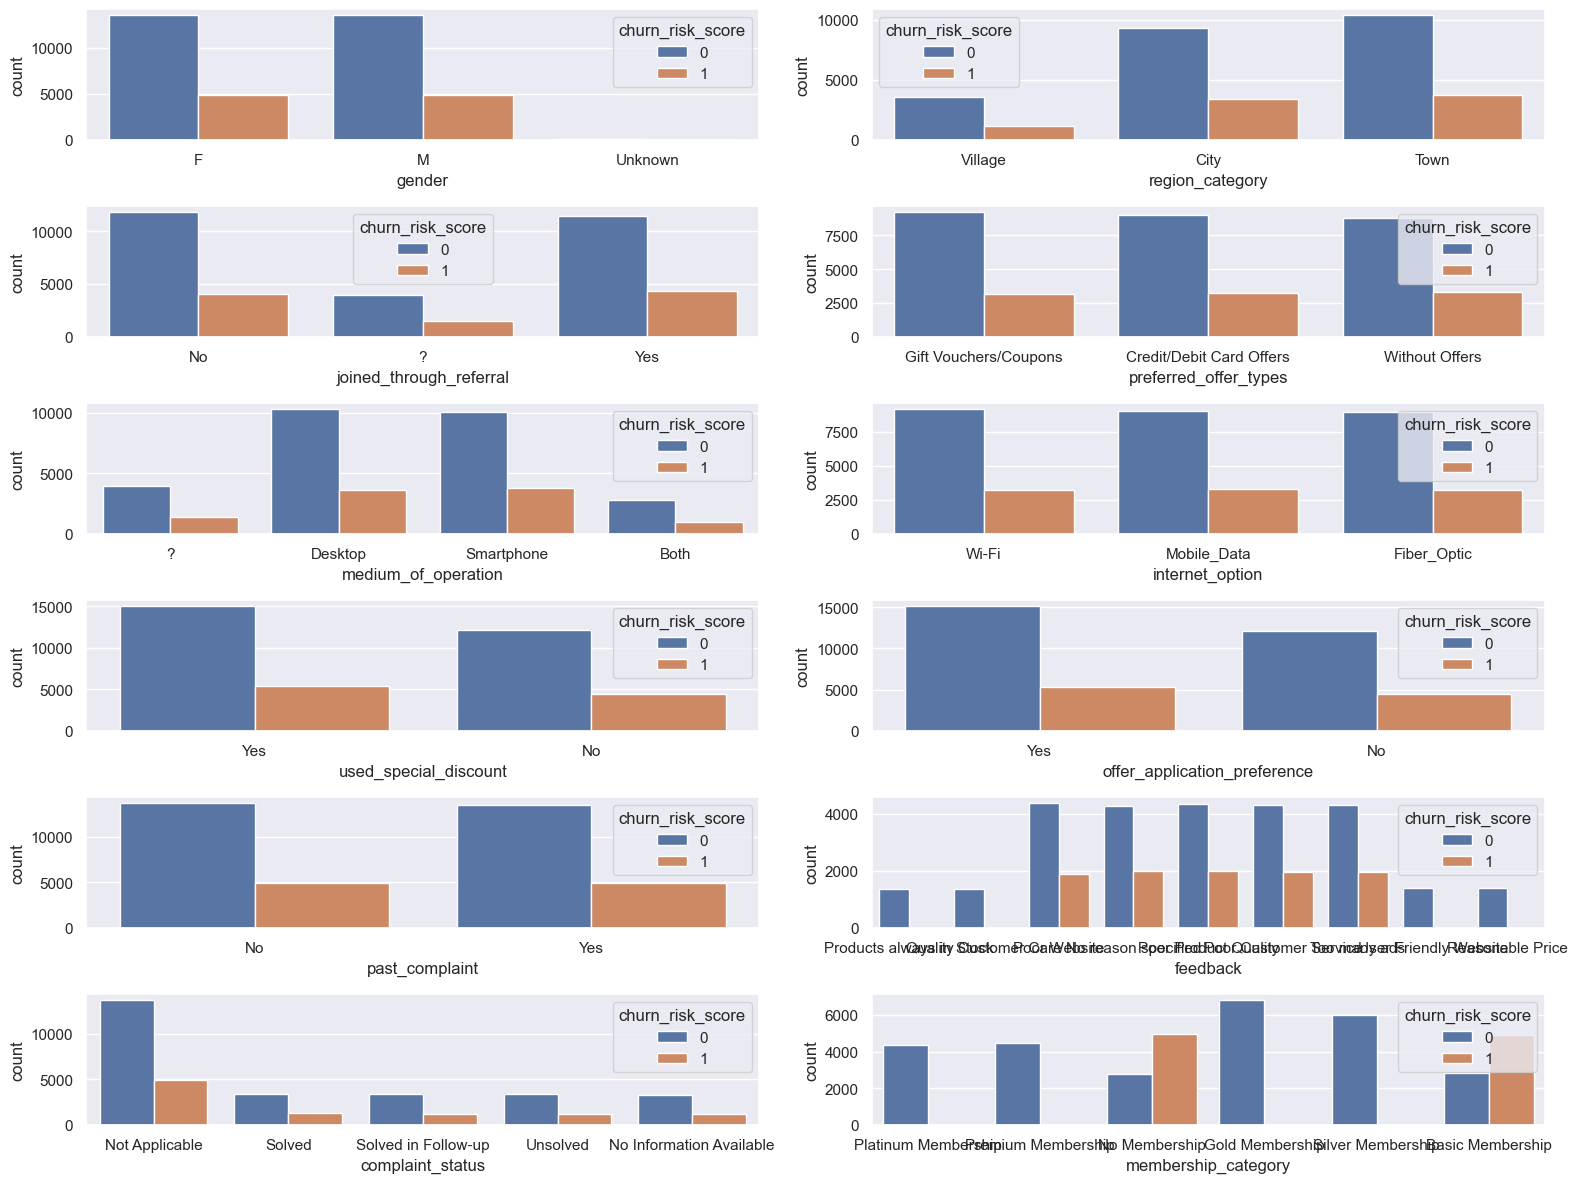

In [158]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16,12))

sns.countplot(x="gender", hue="churn_risk_score", data=df, ax=axes[0,0])

sns.countplot(x="region_category", hue="churn_risk_score", data=df, ax=axes[0,1])

sns.countplot(x="joined_through_referral", hue="churn_risk_score", data=df, ax=axes[1,0])
 
sns.countplot(x="preferred_offer_types", hue="churn_risk_score", data=df, ax=axes[1,1])

sns.countplot(x="medium_of_operation", hue="churn_risk_score", data=df, ax=axes[2,0])

sns.countplot(x="internet_option", hue="churn_risk_score", data=df, ax=axes[2,1])

sns.countplot(x="used_special_discount", hue="churn_risk_score", data=df, ax=axes[3,0])

sns.countplot(x="offer_application_preference", hue="churn_risk_score", data=df,ax=axes[3,1])

sns.countplot(x="past_complaint", hue="churn_risk_score", data=df, ax=axes[4,0])

sns.countplot(x="feedback", hue="churn_risk_score", data=df, ax=axes[4,1])

sns.countplot(x="complaint_status", hue="churn_risk_score", data=df, ax=axes[5,0])

sns.countplot(x="membership_category", hue="churn_risk_score", data=df, ax=axes[5,1])
#sns.countplot(x="points_in_wallet", hue="churn_risk_score", data=df, ax=axes[5,1])


plt.tight_layout()
plt.show()

### It looks 'membership_category' and  'feedback' in the categorical variables is related to churn rate

## Plot Numeric  variable bins by churn status

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16,12))

df['age_bins'] = pd.cut(df['age'].copy(), bins=10)
sns.countplot(x='age_bins', hue='churn_risk_score', data=df,ax=axes[0])

df['avg_transaction_value_bins'] = pd.cut(df['avg_transaction_value'].copy(), bins=10)
sns.countplot(x='avg_transaction_value_bins', hue='churn_risk_score', data=df,ax=axes[1])

df['points_in_wallet_bins'] = pd.cut(df['points_in_wallet'].copy(), bins=10)
sns.countplot(x='points_in_wallet_bins', hue='churn_risk_score', data=df,ax=axes[2])

df['avg_time_spent_bins'] = pd.cut(df['avg_time_spent'].copy(), bins=10)
sns.countplot(x='avg_time_spent_bins', hue='churn_risk_score', data=df,ax=axes[3])


df['days_since_last_login_bins'] = pd.cut(df['days_since_last_login'].copy(), bins=10)
sns.countplot(x='days_since_last_login_bins', hue='churn_risk_score', data=df,ax=axes[4])


plt.tight_layout()
plt.show()


<AxesSubplot:>

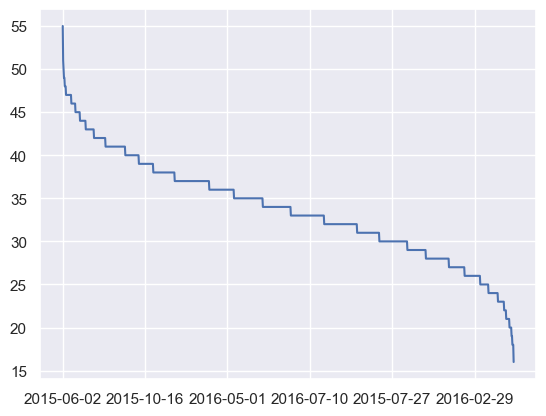

In [201]:
df.joining_date.value_counts().plot()

# Data split


In [167]:
X = df.drop(['churn_risk_score'],axis =1)

y = df['churn_risk_score']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [169]:
print('Train data shape:', X_train.shape)
print('Test data shape:',X_test.shape)

Train data shape: (29593, 25)
Test data shape: (7399, 25)


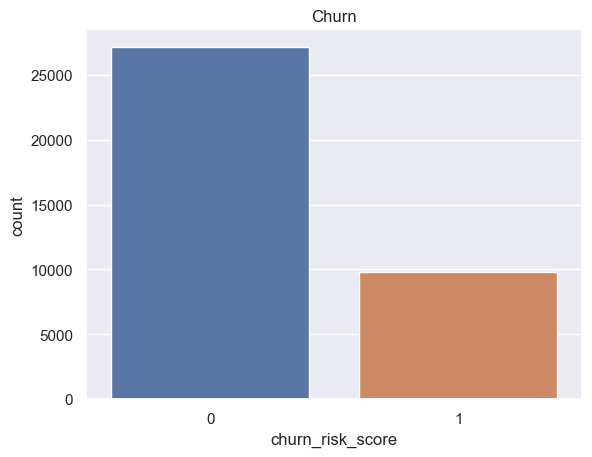

In [170]:
sns.countplot(x=df['churn_risk_score'])
plt.title('Churn')
plt.show()


# Feature engineering

In [190]:
cat_df = X_train.select_dtypes(exclude =[np.number])
num_df = X_train.select_dtypes(include=[np.number])

In [229]:
cat_df.columns

Index(['customer_id', 'Name', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'avg_frequency_login_days',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback'],
      dtype='object')

In [232]:
num_df.columns

Index(['Unnamed: 0', 'age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet'],
      dtype='object')

In [236]:
num_columns = set(num_df)-{'Unnamed: 0'}
num_columns

{'age',
 'avg_time_spent',
 'avg_transaction_value',
 'days_since_last_login',
 'points_in_wallet'}

In [237]:
cat_columns = set(cat_df) - {'Name','security_no','customer_id', 'joining_date','last_visit_time', 'referral_id'}

In [238]:
cat_columns

{'avg_frequency_login_days',
 'complaint_status',
 'feedback',
 'gender',
 'internet_option',
 'joined_through_referral',
 'medium_of_operation',
 'membership_category',
 'offer_application_preference',
 'past_complaint',
 'preferred_offer_types',
 'region_category',
 'used_special_discount'}

## Transform the Traning data¶

In [239]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [240]:
numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)


categorical_transformer = Pipeline(steps=[("imputer_cat", 
                                           SimpleImputer(strategy="most_frequent")), ("encode", OrdinalEncoder())])


In [242]:

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, list(num_df.columns)),
        ("cat", categorical_transformer, list(cat_columns)),
    ]
)



clf = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

clf_fit = clf.fit(X_train)

X_train_tranformed = pd.DataFrame(clf_fit.transform(X_train))

AttributeError: 'set' object has no attribute 'columns'

In [243]:
clf_fit.get_feature_names_out()

array(['num__Unnamed: 0', 'num__age', 'num__days_since_last_login',
       'num__avg_time_spent', 'num__avg_transaction_value',
       'num__points_in_wallet', 'cat__complaint_status',
       'cat__internet_option', 'cat__feedback',
       'cat__medium_of_operation', 'cat__used_special_discount',
       'cat__gender', 'cat__offer_application_preference',
       'cat__region_category', 'cat__avg_frequency_login_days',
       'cat__membership_category', 'cat__past_complaint',
       'cat__preferred_offer_types', 'cat__joined_through_referral'],
      dtype=object)

In [1]:
df

NameError: name 'df' is not defined

##  Check regular missing values

In [94]:
missing_check = pd.DataFrame(
    {'missing_values': X_train.isnull().sum(),
    'percentage': X_train.isnull().sum()*100 / X_train.shape[0]})
missing_check.sort_values(by= 'percentage',ascending = False)

,missing_values,percentage
region_category,4366,14.753489
points_in_wallet_bins,2714,9.171088
points_in_wallet,2714,9.171088
preferred_offer_types,228,0.770452
Unnamed: 0,0,0.000000
avg_time_spent,0,0.000000
avg_time_spent_bins,0,0.000000
avg_transaction_value_bins,0,0.000000
age_bins,0,0.000000
feedback,0,0.000000


In [65]:
df.dropna(inplace = True)

NOTE :  
Some missing values may have other forms than NaN, so continue to check these non-standard missing values

##  Plot categorical variables to check possible missing values

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29593 entries, 3313 to 15795
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Unnamed: 0                    29593 non-null  int64   
 1   customer_id                   29593 non-null  object  
 2   Name                          29593 non-null  object  
 3   age                           29593 non-null  int64   
 4   gender                        29593 non-null  object  
 5   security_no                   29593 non-null  object  
 6   region_category               25227 non-null  object  
 7   membership_category           29593 non-null  object  
 8   joining_date                  29593 non-null  object  
 9   joined_through_referral       29593 non-null  object  
 10  referral_id                   29593 non-null  object  
 11  preferred_offer_types         29365 non-null  object  
 12  medium_of_operation           29593 non-nul

array([<AxesSubplot:ylabel='medium_of_operation'>], dtype=object)

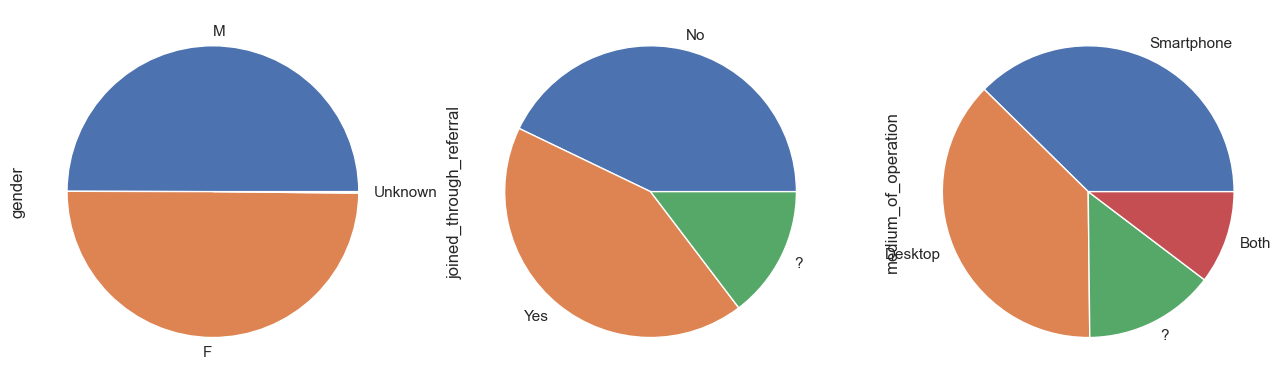

In [96]:
figure, ax = plt.subplots(1, 3,figsize=(16,8))
X_train.gender.value_counts().plot(kind = 'pie', ax = ax[0], subplots=True)
X_train.joined_through_referral.value_counts().plot(kind = 'pie', ax = ax[1], subplots=True)
X_train.medium_of_operation.value_counts().plot(kind = 'pie', ax = ax[2], subplots=True)

From above,  we see several   '?'  and  'unknown' , which are supposed to be missing values

### Initial approach for  missing value handling: dropping

In [ ]:
class missing_value_transformer (object):
    def __init__(self):
         
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['ingredient']=X.ingredient.apply(self.count)
        self.median = df.median()
            
    def transform(self,X, y = None):
        df = pd.DataFrame()
        df['ingredient']=X.ingredient.apply(self.count)
        return df.fillna(self.median)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def count(self,x):
        if type(x) == str: 
            return len(x.split(','))
        
        

In [98]:

X_train['joined_through_referral'] = X_train['joined_through_referral'].replace('?',np.NaN)
X_train['gender'] = X_train['gender'].replace('Unknown',np.NaN)
X_train['medium_of_operation'] = X_train['medium_of_operation'].replace('?',np.NaN)
X_train.dropna(inplace= True)

X_train['joined_through_referral'] = X_train['joined_through_referral'].replace('?',np.NaN)
X_train['gender'] = X_train['gender'].replace('Unknown',np.NaN)
X_train['medium_of_operation'] = X_train['medium_of_operation'].replace('?',np.NaN)
X_train.dropna(inplace= True)

###  Alternative approach for missing value handling, impute them into mode ()

In [69]:
# Missing_cat = df[['gender','preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]
# for i,col in enumerate(Missing_cat):
#     df[col].fillna(df[col].mode()[0], inplace=True)


#### We will use both approaches seperately to train the model later on

##   Handle abnormal values in Numeric variables 


In [99]:
X_train.describe()

,Unnamed: 0,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
count,16578.000000,16578.000000,16578.000000,16578.000000,16578.000000,16578.000000
mean,18495.973459,36.869104,-43.902220,244.667489,29358.146877,688.972186
std,10673.228651,15.946474,232.778492,404.088075,19564.360605,194.267186
min,2.000000,10.000000,-999.000000,-2814.109110,800.460000,-760.661236
25%,9308.250000,23.000000,8.000000,60.232500,14138.495000,617.362500
50%,18441.500000,37.000000,12.000000,160.745000,27641.510000,698.865000
75%,27695.750000,51.000000,16.000000,355.427500,40990.865000,765.567500
max,36991.000000,64.000000,26.000000,3040.410000,99914.050000,2069.069761


### Remove all the < 0 values in NUMERICs and replace them with Nanm

In [100]:
X_train = X_train[X_train["avg_time_spent"] >= 0]
X_train = X_train[X_train["days_since_last_login"] >= 0]
X_train = X_train[X_train["points_in_wallet"] >= 0]

### By checcking dtype, we see ' avg_frequency_login_days ' is in 'object' type, rather than numeric format, so possibly mixed with Str value or missing values

In [101]:
X_train["avg_frequency_login_days"] = pd.to_numeric(X_train["avg_frequency_login_days"], errors='coerce')

In [102]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
X_train['avg_frequency_login_days']=imputer.fit_transform(X_train[['avg_frequency_login_days']])


In [103]:
X_train = X_train[X_train["avg_frequency_login_days"] >= 0]

In [104]:
X_train.head()

,Unnamed: 0,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,...,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,age_bins,avg_transaction_value_bins,points_in_wallet_bins,avg_time_spent_bins,days_since_last_login_bins
3313,3313,fffe43004900440035003000340036003200,Melita Hagood,49,F,ZTCDDE0,Town,Basic Membership,2015-03-26,Yes,...,Yes,Yes,Yes,Solved in Follow-up,Too many ads,"(47.8, 53.2]","(10711.819, 20623.178]","(371.231, 654.204]","(210.735, 815.703]","(-76.5, 26.0]"
31958,31958,fffe43004900440031003000310031003900,Jong Escalera,28,F,M30GTIQ,Town,Gold Membership,2017-01-02,No,...,Yes,No,Yes,Solved,Poor Website,"(26.2, 31.6]","(40445.896, 50357.255]","(654.204, 937.177]","(210.735, 815.703]","(-76.5, 26.0]"
3905,3905,fffe43004900440032003500300033003900,Enid Dresel,63,M,RE4E5HS,Village,No Membership,2015-04-01,No,...,No,Yes,Yes,Unsolved,Too many ads,"(58.6, 64.0]","(701.346, 10711.819]","(371.231, 654.204]","(-394.234, 210.735]","(-76.5, 26.0]"
35044,35044,fffe43004900440031003500340032003900,Eilene Furlong,58,F,QHJMVKB,City,Silver Membership,2016-02-26,Yes,...,No,Yes,Yes,Unsolved,Poor Customer Service,"(53.2, 58.6]","(40445.896, 50357.255]","(371.231, 654.204]","(-394.234, 210.735]","(-76.5, 26.0]"
4254,4254,fffe43004900440034003700320034003600,Francie Constable,26,F,V1N06BT,City,Platinum Membership,2016-11-14,Yes,...,No,Yes,Yes,Solved,Poor Website,"(20.8, 26.2]","(20623.178, 30534.537]","(654.204, 937.177]","(-394.234, 210.735]","(-76.5, 26.0]"


##  Check for duplicated data points

In [105]:
X_train[X_train.duplicated()].sum()

Unnamed: 0                      0.0
customer_id                     0.0
Name                            0.0
age                             0.0
gender                          0.0
security_no                     0.0
region_category                 0.0
membership_category             0.0
joining_date                    0.0
joined_through_referral         0.0
referral_id                     0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
last_visit_time                 0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
dtype: float64

##  Check outliers

In [106]:
column_num = X_train.select_dtypes(include=['int64', 'float64'])
# X_train_num=X_train.select_dtypes(include=[np.number]) 

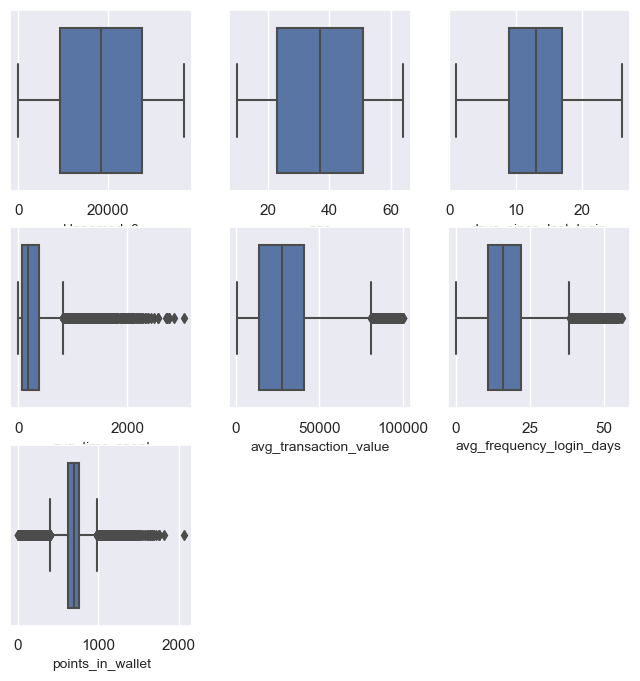

In [107]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(8, 8)) 

for variable, subplot in   zip(column_num.columns,   ax.flatten()):
    z = sns.boxplot(x = column_num[variable], orient = "h",  whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)
    
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

### 4 Outliers:  
avg_time_spent, 
avg_transaction_value, 
points_in_wallet

### remove outliers

In [108]:
Q1 = X_train["avg_time_spent"].quantile(0.25)
Q3 = X_train["avg_time_spent"].quantile(0.75)
IQR = Q3 - Q1
X_train = X_train[(X_train["avg_time_spent"] >= Q1 - 1.5 * IQR) & (X_train["avg_time_spent"] <= Q3 + 1.5 * IQR)]

Q1 = X_train["avg_transaction_value"].quantile(0.25)
Q3 = X_train["avg_transaction_value"].quantile(0.75)
IQR = Q3 - Q1
X_train = X_train[(X_train["avg_transaction_value"] >= Q1 - 1.5 * IQR) & (X_train["avg_transaction_value"] <= Q3 + 1.5 * IQR)]

Q1 = X_train["avg_frequency_login_days"].quantile(0.25)
Q3 = X_train["avg_frequency_login_days"].quantile(0.75)
IQR = Q3 - Q1
X_train = X_train[(X_train["avg_frequency_login_days"] >= Q1 - 1.5 * IQR) & (X_train["avg_frequency_login_days"] <= Q3 + 1.5 * IQR)]


Q1 = X_train["points_in_wallet"].quantile(0.25)
Q3 = X_train["points_in_wallet"].quantile(0.75)
IQR = Q3 - Q1
X_train = X_train[(X_train["points_in_wallet"] >= Q1 - 1.5 * IQR) & (X_train["points_in_wallet"] <= Q3 + 1.5 * IQR)]


### re-check outliers

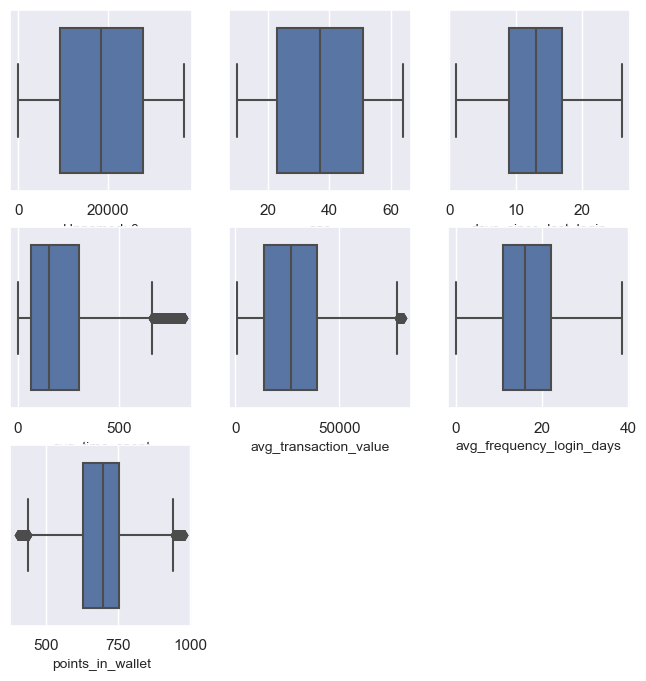

In [109]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(8, 8)) 

for variable, subplot in   zip(column_num.columns,   ax.flatten()):
    z = sns.boxplot(x = X_train[variable], orient = "h",  whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)
    
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

## Categorical Data Encoding 

In [110]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.columns

Index(['customer_id', 'Name', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [111]:
# for column in X_train_cat.columns:
#     print(f"Value counts for column {column}:")
#     print(X_train_cat[column].value_counts())
#     print('--------------------------------------------')

### Use ordinal imputation to encode ‘membership categery’ and ‘compliant status’， given the internal meaningful orders

In [112]:
from sklearn.preprocessing import OrdinalEncoder

ord_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership",
                                                        "Gold Membership","Platinum Membership","Premium Membership"]])

X_train['membership_category'] = ord_membership_category.fit_transform(X_train['membership_category'].values.reshape(-1,1))



In [113]:
ord_complaint_status = OrdinalEncoder(categories = [["Not Applicable", "Solved", "Unsolved","Solved in Follow-up","No Information Available"]])

X_train['complaint_status'] = ord_complaint_status.fit_transform(X_train['complaint_status'].values.reshape(-1,1))

### Use get_dummy to encode the other categorical variables, e.g. region, referal, ofer type etc

In [114]:
X_train_cat = X_train[['region_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option',
             'used_special_discount','offer_application_preference','past_complaint','feedback']]

X_train_categorical = pd.get_dummies(X_train_cat, drop_first=True)

### Concate X_train_categorical and original X_train

In [115]:
X_train = pd.concat ([X_train,X_train_categorical],axis = 1)

## Feature selection and abstraction

The bins for some numverical variables are in the dataframe so need to remove them

In [116]:
# remove all columns contains "bins"

columns_bins = X_train.columns[X_train.columns.str.contains('bins')]

X_train = X_train.drop(columns_bins, axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 3313 to 15795
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   11145 non-null  int64  
 1   customer_id                                  11145 non-null  object 
 2   Name                                         11145 non-null  object 
 3   age                                          11145 non-null  int64  
 4   gender                                       11145 non-null  object 
 5   security_no                                  11145 non-null  object 
 6   region_category                              11145 non-null  object 
 7   membership_category                          11145 non-null  float64
 8   joining_date                                 11145 non-null  object 
 9   joined_through_referral                      11145 non-null  object 


### We also need to remove all the columns based on which one hot encoding was conductedM

In [117]:
X_train = X_train.drop(['region_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option',
             'used_special_discount','offer_application_preference','past_complaint','feedback'], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 3313 to 15795
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   11145 non-null  int64  
 1   customer_id                                  11145 non-null  object 
 2   Name                                         11145 non-null  object 
 3   age                                          11145 non-null  int64  
 4   gender                                       11145 non-null  object 
 5   security_no                                  11145 non-null  object 
 6   membership_category                          11145 non-null  float64
 7   joining_date                                 11145 non-null  object 
 8   referral_id                                  11145 non-null  object 
 9   last_visit_time                              11145 non-null  object 


In [118]:
X_train.drop(['Name','customer_id','security_no','gender','referral_id','Unnamed: 0','last_visit_time'],axis = 1,inplace =  True)


In [119]:
X_train.head()

,age,membership_category,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,complaint_status,region_category_Town,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,1.0,2015-03-26,2,572.77,19641.41,23.000000,600.54,3.0,1,...,1,1,0,0,0,0,0,0,1,0
31958,28,3.0,2017-01-02,14,308.77,45564.89,36.926599,716.28,1.0,1,...,0,1,0,0,1,0,0,0,0,0
35044,58,2.0,2016-02-26,3,30.10,44766.29,21.000000,613.67,2.0,0,...,1,1,1,0,0,0,0,0,0,0
4254,26,4.0,2016-11-14,2,114.42,26507.16,7.000000,751.05,1.0,0,...,1,1,0,0,1,0,0,0,0,0
30939,53,0.0,2017-10-22,19,72.87,14625.81,15.000000,714.17,3.0,0,...,0,1,0,1,0,0,0,0,0,0


### Feature abstract

In [120]:
X_train['Tenure_year']=X_train.joining_date.apply(lambda x:2022-int(x.split('-')[0]))


In [121]:
X_train.drop (['joining_date'],axis=1, inplace=True)

## Multicollinearity check among Numeric variables

In [122]:
column_num = X_train.select_dtypes(include=['int64', 'float64'])

<AxesSubplot:>

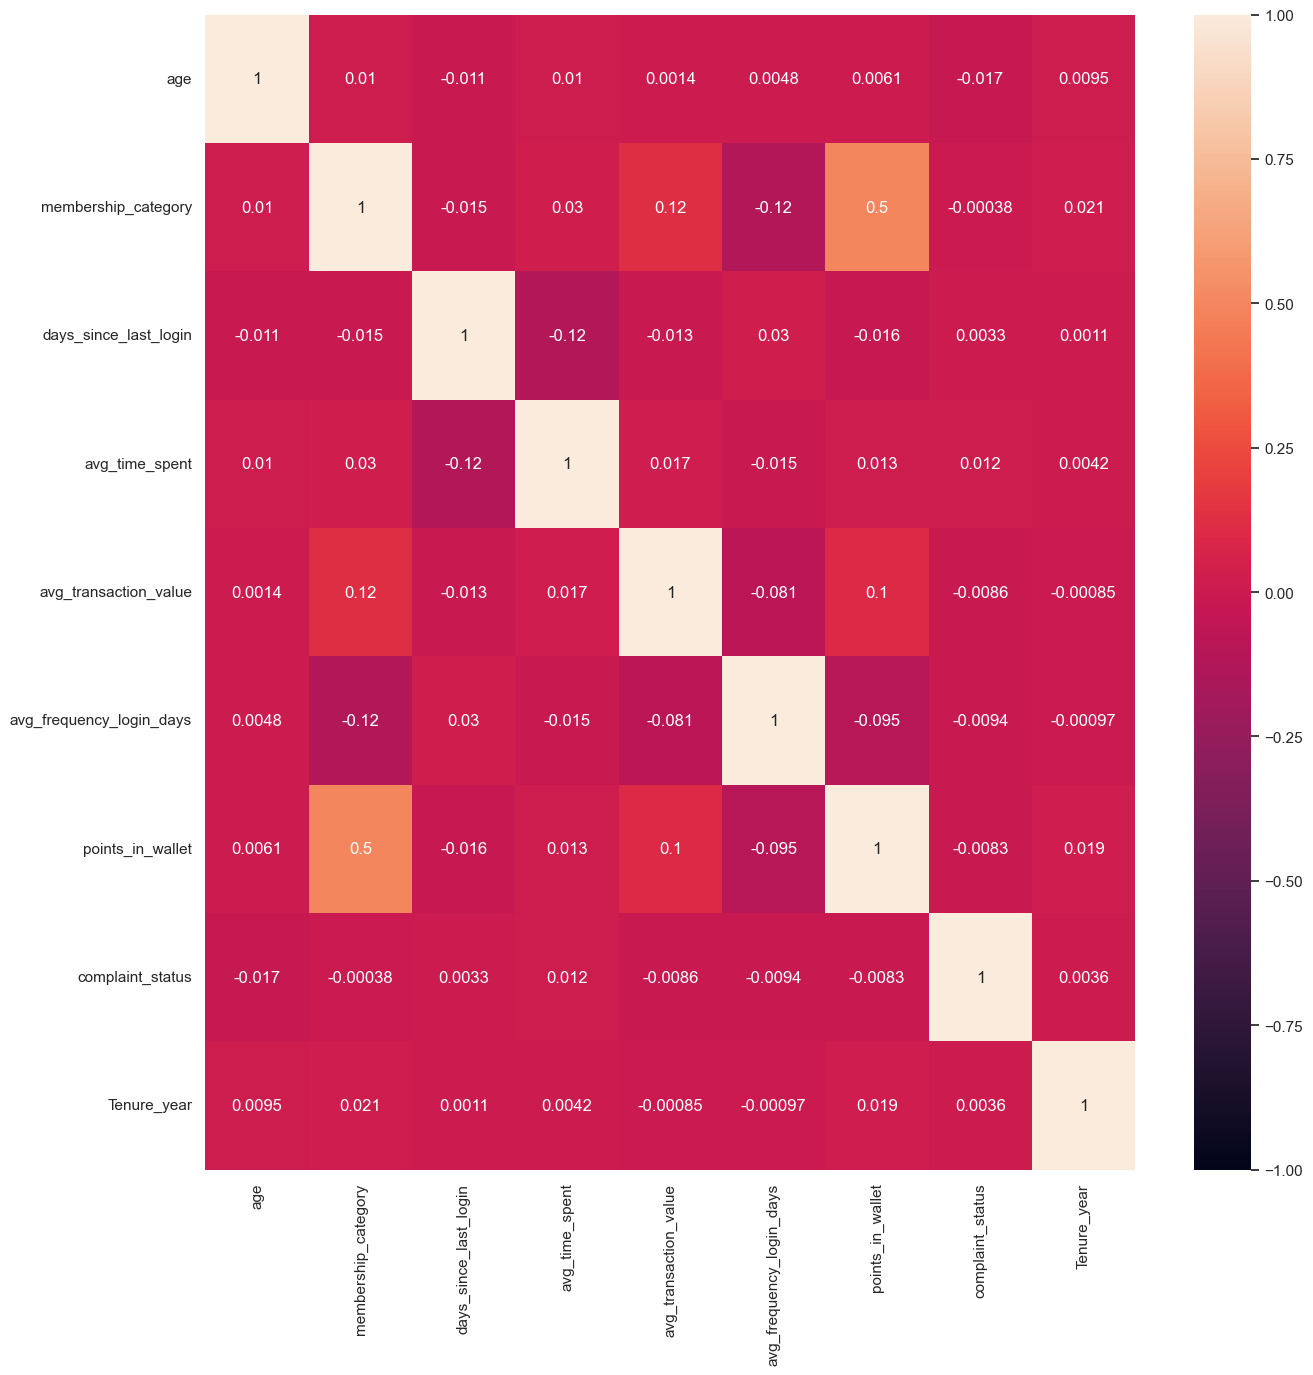

In [123]:
fig, ax = plt.subplots(figsize =(15,15))
sns.heatmap(column_num.corr(method='pearson'), vmin=-1, vmax=1, annot=True)
#plt.yticks(rotation=45)

## Handle data imbalance with SMOTE (over- and under-sampling)

In [124]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [143]:
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [11145, 29593]

In [139]:
# # define pipeline
# smote = SMOTE(sampling_strategy='minority')
# X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

try:
    smote = SMOTE(sampling_strategy='minority')
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
except Exception as e:
    print(e)

Found input variables with inconsistent numbers of samples: [11145, 29593]


# Split data into train and test

# Pipeline setup

In [47]:
>>> from sklearn.pipeline import Pipeline
>>> from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [48]:
mysteps1 = [
         ('rescale', MinMaxScaler()), 
         ('lgr', LogisticRegression(random_state=42))] 

model_1 = Pipeline(steps=mysteps1)

model_1 = model_1.fit(X_train, y_train) 

y_train_pred_1 = model_1.predict(X_train)

y_test_pred_1 = model_1.predict(X_test)

ValueError: could not convert string to float: 'fffe43004900440035003000340036003200'

## accuracy report of traing and test datasets

In [ ]:
from sklearn import metrics

print ("train_accuracy_score: ", metrics.accuracy_score(y_train, y_train_pred_1))
print ('**********************************************')
print ("test_accuracy_score: ", metrics.accuracy_score(y_test, y_test_pred_1))

print ('**********************************************')

print ("train_classification_report \n", metrics.classification_report(y_train, y_train_pred_1))
print ('**********************************************')
print ("test_classification_report \n", metrics.classification_report(y_test, y_test_pred_1))

## Confusion matrix of traina and test datasets

In [ ]:
cm_train=metrics.confusion_matrix(y_train, y_train_pred_1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_train, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        ax.text(x=j, y=i,s=cm_train[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Train Confusion Matrix', fontsize=12)
plt.show()

In [ ]:
cm_train = metrics.confusion_matrix(y_test, y_test_pred_1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_train, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        ax.text(x=j, y=i,s=cm_train[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Train Confusion Matrix', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model_1.predict_proba(X_train)[:, 1])

In [ ]:
roc_auc_score_1 = roc_auc_score(y_test, model_1.predict_proba(X_test)[:, 1])
roc_auc_score_1

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model_1.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr)

# Try RF model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

In [ ]:
mysteps_2 = [
         ('rescale', MinMaxScaler()), 
         ('RFC', RandomForestClassifier(random_state=42))] 

model_2 = Pipeline(steps=mysteps_2)

model_2 = model_2.fit(X_train, y_train) 

y_train_pred_2 = model_2.predict(X_train)

y_test_pred_2 = model_2.predict(X_test)


print ("test_accuracy_score: ", metrics.accuracy_score(y_test, y_test_pred_2))


print ("test_classification_report \n", metrics.classification_report(y_test, y_test_pred_2))

In [ ]:
roc_auc_score2 = roc_auc_score(y_test, model_2.predict_proba(X_test)[:, 1])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model_2.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr)

In [ ]:
cm_train=metrics.confusion_matrix(y_train, y_train_pred_2)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_train, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        ax.text(x=j, y=i,s=cm_train[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Train Confusion Matrix', fontsize=12)
plt.show()

In [ ]:
cm_train=metrics.confusion_matrix(y_test, y_test_pred_2)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_train, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        ax.text(x=j, y=i,s=cm_train[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Train Confusion Matrix', fontsize=12)
plt.show()

## Find the most related Features and delete unrelated ones, re-train RF model

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': model_2[-1].feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [ ]:
X_3 = features.drop(['region_category_Village',
                       'offer_application_preference_Yes',
                       'used_special_discount_Yes',
                       'preferred_offer_types_Gift Vouchers/Coupons',
                       'past_complaint_Yes',
                       'preferred_offer_types_Without Offers',
                       'medium_of_operation_Smartphone',
                       'medium_of_operation_Desktop',
                       'internet_option_Wi-Fi',
                       'internet_option_Mobile_Data',
                       'joined_through_referral_Yes',
                       'region_category_Town',
                      ], axis =1)
y_3 = target


In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20, random_state=42)


In [ ]:
mysteps_3 = [
         ('rescale', MinMaxScaler()), 
         ('RFC', RandomForestClassifier(random_state=42))] 

model_3 = Pipeline(steps = mysteps_3)

model_3 = model_3.fit(X_train_3, y_train_3) 

y_train_pred_3 = model_3.predict(X_train_3)

y_test_pred_3 = model_3.predict(X_test_3)



In [ ]:
print ("test_accuracy_score: ", metrics.accuracy_score(y_test_3, y_test_pred_3))
print ('*******************************************')

print ("test_classification_report \n", metrics.classification_report(y_test_3, y_test_pred_3))


print ('*******************************************')

print ("test_accuracy_score: ", metrics.accuracy_score(y_test, y_test_pred_2))
print ('*******************************************')


print ("test_classification_report \n", metrics.classification_report(y_test, y_test_pred_2))


In [ ]:
# categorical_feature = telco_df.dtypes==object
# categorical_cols = telco_df.columns[categorical_feature].tolist()

# numeric_feature = telco_df.dtypes!=object
# numerical_cols = telco_df.columns[numeric_feature].tolist()

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

## get all non-numeric values from a column


In [ ]:
def is_non_numeric(x):
    try:
        float(x)
        return False
    except ValueError:
        return True

In [ ]:
non_numeric_values = df['avg_frequency_login_days'].apply(is_non_numeric)

non_numeric_df = df.avg_frequency_login_days[non_numeric_values]

non_numeric_df

In [ ]:
missing_check = pd.DataFrame(
    {'missing_values': df.isnull().sum(),
    'percentage': df.isnull().sum()*100 / df.shape[0]})


missing_check.sort_values(by= 'percentage',ascending = False)

In [ ]:
df_num=df.drop('churn_risk_score', axis=1).select_dtypes(include=[np.number]) 

fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10))

for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.kdeplot(x = df_num[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

#如何分开两组划线？

In [ ]:
###  how to make two list subtract????

# numerical_features_list =  list (numerical_features_df)
# all_features_list = list(df)

# categorical_features_list = np.array(all_features_list) - np.array (numerical_features_list)


# categorical_features_list = all_features_list - numerical_features_list

# categorical_features_df  = df.loc[:, numerical_features_list]
# categorical_features_df .head()

### 为什么这个ＣＯＤＥ返回　不正确？　应该用ＯＢＪＥＣＴ,　不用ＣＡＴＥＧＡＲＹ!!!

# df_categorical_features = df.select_dtypes(include='object')
# df_categorical_features

In [ ]:
Try to make a def to do all solumns plot:
    
# def check_data_unique_status (df):
#     for i in column_list:
#         df[i].value_count()
    
# figure, ax = plt.subplots(3, 3,figsize=(12,8))



# df.gender.value_counts().plot(kind = 'pie', ax = ax[0, 0], subplots=True)
# ax[0, 0].set_title("Product Level")


# plt.tight_layout()